# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
import spacy
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
Mobile_reviews= []

In [4]:
mobile_snapdeal=[]
url1= "https://www.snapdeal.com/product/redmi-note3-32gb/654134757432/reviews?page=434&sortBy=RECENCY"

for i in range(1,10):
    ip= []  
    base_url= url1
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        mobile_snapdeal= mobile_snapdeal+ip

In [5]:
### Removing repeated reviews 
mobile_snapdeal = list(set(mobile_snapdeal))

In [6]:
# Writing reviews into text file 
with open("mb_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(mobile_snapdeal))

In [7]:
mobile_snapdeal

['Best phone in this range',
 'Go for it!!!',
 "Redesigned metal body. One of the most attractive features in the Redmi Note 3 is its stunning design. The new smartphone arrives just in time to compete against the very attractive Meizu Metal betting on a metal body that gives the smartphone a nice sharp look that differentiates it from other mid-range phones in the market. \n\nFull HD Screen and a Fingerprint scanner. Ok so the Full HD screen is nothing new, but that doesn't mean it's not a big Redmi Note 3 pro. Specifically, we've got a 5.5 inch Full HD screen with Gorilla Glass 3 coating and a pixel density of 403 ppp. Not too shabby if you ask us. \n\nAnother major upgrade in the new Xiaomi smartphone is its fingerprint scanner, located on the back side of the smartphone, below the flash. This gives way to good ergonomics and an overall good experience when handling the smartphone.\n\nOcta Core CPU and a 3 GB RAM option. Xiaomi opted to repeat the CPU it placed on the Redmi Note 2 (

In [8]:
mb_snapd= pd.read_csv('mb_snapdeal.txt',encoding='Latin-1')
mb_snapd

,['Best phone in this range','Go for it!!!',"""Redesigned metal body. One of the most attractive features in the Redmi Note 3 is its stunning design. The new smartphone arrives just in time to compete against the very attractive Meizu Metal betting on a metal body that gives the smartphone a nice sharp look that differentiates it from other mid-range phones in the market. \n\nFull HD Screen and a Fingerprint scanner. Ok so the Full HD screen is nothing new",but that doesn't mean it's not a big Redmi Note 3 pro. Specifically,we've got a 5.5 inch Full HD screen with Gorilla Glass 3 coating and a pixel density of 403 ppp. Not too shabby if you ask us. \n\nAnother major upgrade in the new Xiaomi smartphone is its fingerprint scanner,located on the back side of the smartphone,below the flash. This gives way to good ergonomics and an overall good experience when handling the smartphone.\n\nOcta Core CPU and a 3 GB RAM option. Xiaomi opted to repeat the CPU it placed on the Redmi Note 2 (if it ain't broke...). That's an octa core Helio X10 CPU with a 64 bit architecture that clocks in at 2.0 GHz. \n\nHowever,although it opted to repeat the CPU settings it didn't repeat the RAM setting. To be more specific,the new flagship comes in two options; a 2 GB RAM option and a slightly more expensive 3 GB RAM option. This is a major thing considering that most top tier smartphones that cost double or more than what Xiaomi is asking don't tend to go over the 3 GB of RAM.\n\nFinally a Battery that lasts. Another big update came in the form of a bigger battery. The Redmi Note 3 features a 4000 mAh battery which is a big step up over the 3060 mAh battery placed on the Note 2. To put it more bluntly,the Redmi Note 3 offers up to 264 hours of talk time over a 3G network while the previous model barely made it over the 140 hour benchmark. In real life use this means that the Note 3 will give us about a day and a half of good usage which,...,'Best phone in its price range... Phone is buttery smooth..','It is the great experience. The product is really good. and Service of snapdeal is Awesome.\nI must say to all buy readmi Note 3 32 GB from snapdeal. \nThanks to sanpdeal and MI for this.','Good phone at this price','Good product','nice phone','Product is very good but dont buy it from snapdeal,Unnamed: 21,worst experience','Camera is very poor\nOther wise hand is superb','Very nice phone but I m disappointed with camera. Rest is awesome configurations.']


In [9]:
mb_snapd= ' '.join(mb_snapd)
mb_snapd

'[\'Best phone in this range\'  \'Go for it!!!\'  "Redesigned metal body. One of the most attractive features in the Redmi Note 3 is its stunning design. The new smartphone arrives just in time to compete against the very attractive Meizu Metal betting on a metal body that gives the smartphone a nice sharp look that differentiates it from other mid-range phones in the market. \\n\\nFull HD Screen and a Fingerprint scanner. Ok so the Full HD screen is nothing new  but that doesn\'t mean it\'s not a big Redmi Note 3 pro. Specifically  we\'ve got a 5.5 inch Full HD screen with Gorilla Glass 3 coating and a pixel density of 403 ppp. Not too shabby if you ask us. \\n\\nAnother major upgrade in the new Xiaomi smartphone is its fingerprint scanner  located on the back side of the smartphone  below the flash. This gives way to good ergonomics and an overall good experience when handling the smartphone.\\n\\nOcta Core CPU and a 3 GB RAM option. Xiaomi opted to repeat the CPU it placed on the Re

In [10]:
# Remove Punctuations 
no_punc_text= mb_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Best phone in this range  Go for it  Redesigned metal body One of the most attractive features in the Redmi Note 3 is its stunning design The new smartphone arrives just in time to compete against the very attractive Meizu Metal betting on a metal body that gives the smartphone a nice sharp look that differentiates it from other midrange phones in the market nnFull HD Screen and a Fingerprint scanner Ok so the Full HD screen is nothing new  but that doesnt mean its not a big Redmi Note 3 pro Specifically  weve got a 55 inch Full HD screen with Gorilla Glass 3 coating and a pixel density of 403 ppp Not too shabby if you ask us nnAnother major upgrade in the new Xiaomi smartphone is its fingerprint scanner  located on the back side of the smartphone  below the flash This gives way to good ergonomics and an overall good experience when handling the smartphonennOcta Core CPU and a 3 GB RAM option Xiaomi opted to repeat the CPU it placed on the Redmi Note 2 if it aint broke Thats an octa c

In [11]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Best phone in this range  Go for it  Redesigned metal body One of the most attractive features in the Redmi Note 3 is its stunning design The new smartphone arrives just in time to compete against the very attractive Meizu Metal betting on a metal body that gives the smartphone a nice sharp look that differentiates it from other midrange phones in the market nnFull HD Screen and a Fingerprint scanner Ok so the Full HD screen is nothing new  but that doesnt mean its not a big Redmi Note 3 pro Specifically  weve got a 55 inch Full HD screen with Gorilla Glass 3 coating and a pixel density of 403 ppp Not too shabby if you ask us nnAnother major upgrade in the new Xiaomi smartphone is its fingerprint scanner  located on the back side of the smartphone  below the flash This gives way to good ergonomics and an overall good experience when handling the smartphonennOcta Core CPU and a 3 GB RAM option Xiaomi opted to repeat the CPU it placed on the Redmi Note 2 if it aint broke Thats an octa c

# Tokenization of words

In [12]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(no_url_text)
tokens = [token.text for token in doc]
tokens[:10]

C:\Users\nishitha\AppData\Roaming\Python\Python311\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


['Best', 'phone', 'in', 'this', 'range', ' ', 'Go', 'for', 'it', ' ']

In [13]:
len(tokens)

664

In [14]:
# Create stop words list
stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [15]:
no_stop_tokens= [word for word in tokens if not word in stopwords]
print(no_stop_tokens)

['Best', 'phone', 'range', ' ', 'Go', ' ', 'Redesigned', 'metal', 'body', 'One', 'attractive', 'features', 'Redmi', 'Note', '3', 'stunning', 'design', 'The', 'new', 'smartphone', 'arrives', 'time', 'compete', 'attractive', 'Meizu', 'Metal', 'betting', 'metal', 'body', 'gives', 'smartphone', 'nice', 'sharp', 'look', 'differentiates', 'midrange', 'phones', 'market', 'nnFull', 'HD', 'Screen', 'Fingerprint', 'scanner', 'Ok', 'Full', 'HD', 'screen', 'new', ' ', 'nt', 'mean', 'big', 'Redmi', 'Note', '3', 'pro', 'Specifically', ' ', 've', 'got', '55', 'inch', 'Full', 'HD', 'screen', 'Gorilla', 'Glass', '3', 'coating', 'pixel', 'density', '403', 'ppp', 'Not', 'shabby', 'ask', 'nnAnother', 'major', 'upgrade', 'new', 'Xiaomi', 'smartphone', 'fingerprint', 'scanner', ' ', 'located', 'smartphone', ' ', 'flash', 'This', 'gives', 'way', 'good', 'ergonomics', 'overall', 'good', 'experience', 'handling', 'smartphonennOcta', 'Core', 'CPU', '3', 'GB', 'RAM', 'option', 'Xiaomi', 'opted', 'repeat', 'CPU',

In [16]:
# Converting all tokens to lower case
lower_tokens = [token.lower() for token in no_stop_tokens]
lower_tokens[:10]

['best',
 'phone',
 'range',
 ' ',
 'go',
 ' ',
 'redesigned',
 'metal',
 'body',
 'one']

In [17]:
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_tokens))
print(doc)

best phone range   go   redesigned metal body one attractive features redmi note 3 stunning design the new smartphone arrives time compete attractive meizu metal betting metal body gives smartphone nice sharp look differentiates midrange phones market nnfull hd screen fingerprint scanner ok full hd screen new   nt mean big redmi note 3 pro specifically   ve got 55 inch full hd screen gorilla glass 3 coating pixel density 403 ppp not shabby ask nnanother major upgrade new xiaomi smartphone fingerprint scanner   located smartphone   flash this gives way good ergonomics overall good experience handling smartphonennocta core cpu 3 gb ram option xiaomi opted repeat cpu placed redmi note 2 ai nt broke that s octa core helio x10 cpu 64 bit architecture clocks 20 ghz nnhowever   opted repeat cpu settings nt repeat ram setting to specific   new flagship comes options 2 gb ram option slightly expensive 3 gb ram option this major thing considering tier smartphones cost double xiaomi asking nt ten

In [18]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['good', 'phone', 'range', '  ', 'go', '  ', 'redesign', 'metal', 'body', 'one', 'attractive', 'feature', 'redmi', 'note', '3', 'stunning', 'design', 'the', 'new', 'smartphone', 'arrive', 'time', 'compete', 'attractive', 'meizu', 'metal', 'bet', 'metal', 'body', 'give', 'smartphone', 'nice', 'sharp', 'look', 'differentiate', 'midrange', 'phone', 'market', 'nnfull', 'hd', 'screen', 'fingerprint', 'scanner', 'ok', 'full', 'hd', 'screen', 'new', '  ', 'not', 'mean', 'big', 'redmi', 'note', '3', 'pro', 'specifically', '  ', 've', 'get', '55', 'inch', 'full', 'hd', 'screen', 'gorilla', 'glass', '3', 'coating', 'pixel', 'density', '403', 'ppp', 'not', 'shabby', 'ask', 'nnanother', 'major', 'upgrade', 'new', 'xiaomi', 'smartphone', 'fingerprint', 'scanner', '  ', 'locate', 'smartphone', '  ', 'flash', 'this', 'give', 'way', 'good', 'ergonomic', 'overall', 'good', 'experience', 'handle', 'smartphonennocta', 'core', 'cpu', '3', 'gb', 'ram', 'option', 'xiaomi', 'opt', 'repeat', 'cpu', 'place', '

In [19]:
clean_reviews= ' '.join(lemmas)
clean_reviews

'good phone range    go    redesign metal body one attractive feature redmi note 3 stunning design the new smartphone arrive time compete attractive meizu metal bet metal body give smartphone nice sharp look differentiate midrange phone market nnfull hd screen fingerprint scanner ok full hd screen new    not mean big redmi note 3 pro specifically    ve get 55 inch full hd screen gorilla glass 3 coating pixel density 403 ppp not shabby ask nnanother major upgrade new xiaomi smartphone fingerprint scanner    locate smartphone    flash this give way good ergonomic overall good experience handle smartphonennocta core cpu 3 gb ram option xiaomi opt repeat cpu place redmi note 2 be not break that s octa core helio x10 cpu 64 bit architecture clock 20 ghz nnhowever    opt repeat cpu setting not repeat ram setting to specific    new flagship come option 2 gb ram option slightly expensive 3 gb ram option this major thing consider tier smartphone cost double xiaomi ask not tend 3 gb ramnnfinally

# Feature extraction

In [20]:
cv= CountVectorizer()
clean_reviewscv= cv.fit_transform(lemmas)

In [21]:
cv.vocabulary_

{'good': 83,
 'phone': 133,
 'range': 149,
 'go': 82,
 'redesign': 155,
 'metal': 108,
 'body': 29,
 'one': 129,
 'attractive': 17,
 'feature': 70,
 'redmi': 156,
 'note': 120,
 'stunning': 182,
 'design': 55,
 'the': 189,
 'new': 114,
 'smartphone': 171,
 'arrive': 15,
 'time': 193,
 'compete': 42,
 'meizu': 107,
 'bet': 25,
 'give': 80,
 'nice': 115,
 'sharp': 168,
 'look': 101,
 'differentiate': 57,
 'midrange': 111,
 'market': 104,
 'nnfull': 117,
 'hd': 90,
 'screen': 162,
 'fingerprint': 71,
 'scanner': 161,
 'ok': 128,
 'full': 75,
 'not': 119,
 'mean': 105,
 'big': 26,
 'pro': 142,
 'specifically': 176,
 've': 202,
 'get': 78,
 '55': 9,
 'inch': 95,
 'gorilla': 85,
 'glass': 81,
 'coating': 39,
 'pixel': 134,
 'density': 54,
 '403': 8,
 'ppp': 138,
 'shabby': 167,
 'ask': 16,
 'nnanother': 116,
 'major': 103,
 'upgrade': 199,
 'xiaomi': 209,
 'locate': 100,
 'flash': 73,
 'this': 191,
 'way': 204,
 'ergonomic': 64,
 'overall': 132,
 'experience': 67,
 'handle': 89,
 'smartphone

In [22]:
cv.get_feature_names_out()

array(['140', '16', '20', '21', '264', '3060', '32', '4000', '403', '55',
       '64', '6s', 'another', 'appreciate', 'architecture', 'arrive',
       'ask', 'attractive', 'awesome', 'awesomeni', 'bad', 'barely',
       'battery', 'be', 'benchmark', 'bet', 'big', 'bit', 'bluntly',
       'body', 'break', 'buttery', 'buy', 'camera', 'camerannxiaomi',
       'capacity', 'card', 'choose', 'clock', 'coating', 'come',
       'compare', 'compete', 'con', 'configuration', 'consider',
       'consnnno', 'core', 'cost', 'cpu', 'date', 'day', 'decent',
       'delivery', 'density', 'design', 'device', 'differentiate',
       'disadvantage', 'disappointed', 'double', 'dual', 'early', 'end',
       'ergonomic', 'expect', 'expensive', 'experience', 'face', 'fall',
       'feature', 'fingerprint', 'flagship', 'flash', 'form', 'full',
       'galaxy', 'gb', 'get', 'ghz', 'give', 'glass', 'go', 'good',
       'goodnna', 'gorilla', 'great', 'half', 'hand', 'handle', 'hd',
       'heat', 'helio', 'hour'

In [23]:
# Convert the vocabulary to a data frame
pd.DataFrame(cv.vocabulary_,index = [0]).T

,0
good,83
phone,133
range,149
go,82
redesign,155
...,...
very,203
disappointed,59
rest,158
awesome,18


In [24]:
pd.DataFrame(cv.vocabulary_,index = [0]).T.sort_values(by = 0 ,ascending =False)

,0
you,210
xiaomi,209
x10,208
wise,207
while,206
...,...
264,4
21,3
20,2
16,1


# Including bigram and trigram

In [25]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [26]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['arrive' 'ask' 'attractive' 'battery' 'big' 'body' 'buy' 'camera' 'card'
 'come' 'consider' 'core' 'cpu' 'delivery' 'experience' 'feature'
 'fingerprint' 'flash' 'full' 'gb' 'get' 'give' 'good' 'hd' 'hour' 'mah'
 'major' 'mean' 'megapixel' 'metal' 'microsd' 'new' 'nice' 'not' 'note'
 'nthank' 'obviously' 'octa' 'offer' 'ok' 'one' 'opt' 'option' 'overall'
 'phone' 'pixel' 'place' 'point' 'poornother' 'ppp' 'pretty' 'previous'
 'price' 'pro' 'product' 'promise' 'quality' 'quick' 'ram' 'ramnnfinally'
 'range' 'readmi' 'rear' 'redmi' 'repeat' 'scanner' 'screen' 'selling'
 'set' 'setting' 'slot' 'smartphone' 'snapdeal' 'specifically' 'suppose'
 'talk' 'tend' 'term' 'that' 'the' 'thing' 'this' 'tier' 'time' 'to'
 'tone' 'truth' 'unnamed' 'update' 'upgrade' 'usage' 'use' 've' 'very'
 'way' 'whichever' 'while' 'wise' 'x10' 'xiaomi']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFIDF vectorizer

In [27]:
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

In [28]:
tfidf_matix_ngram

<404x211 sparse matrix of type '<class 'numpy.float64'>'
	with 352 stored elements in Compressed Sparse Row format>

In [29]:
tfidf_matix_ngram.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Generate a world cloud

In [30]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(12, 8))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

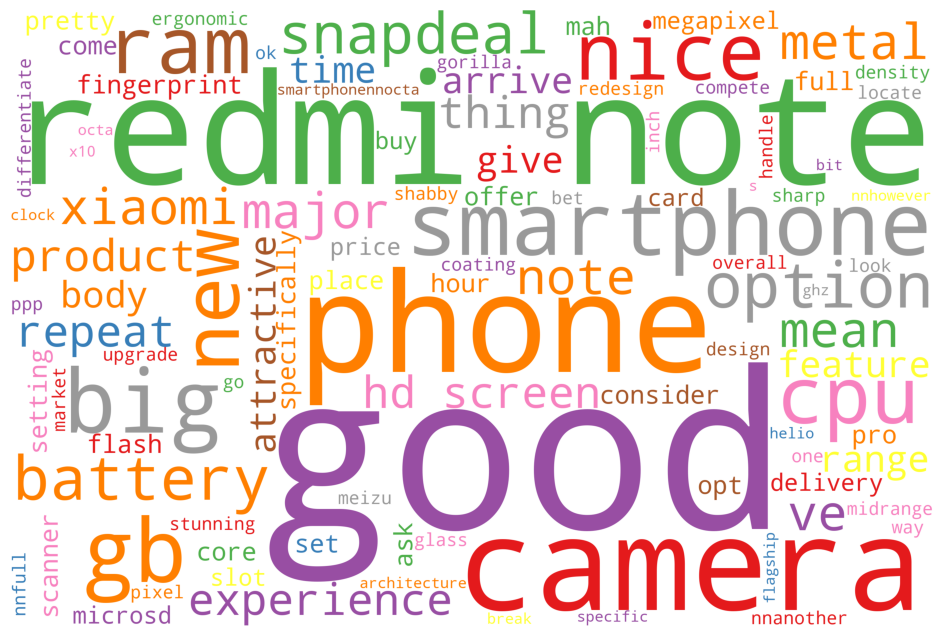

In [31]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white',
                     max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_reviews)
# Plot
plot_cloud(wordcloud)

# Named entity recognizer

In [32]:
nlp=spacy.load('en_core_web_sm')
block= clean_reviews
doc_block= nlp(block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

C:\Users\nishitha\AppData\Roaming\Python\Python311\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)

cpu NOUN
3 NUM
gb NOUN
ram NOUN
option NOUN
xiaomi NOUN
opt VERB
repeat NOUN
cpu NOUN
place NOUN
redmi NOUN
note NOUN
2 NUM
be AUX
not PART
break VERB
that PRON
s PART
octa ADJ
core NOUN
helio NOUN
x10 PROPN
cpu PROPN
64 NUM
bit NOUN
architecture NOUN
clock NOUN
20 NUM
ghz NOUN
nnhowever NOUN
    SPACE
opt VERB
repeat NOUN
cpu NOUN
setting VERB
not PART
repeat VERB
ram NOUN
setting NOUN
to ADP
specific ADJ
    SPACE
new ADJ
flagship NOUN
come VERB
option NOUN
2 NUM
gb NOUN
ram NOUN
option NOUN
slightly ADV
expensive ADJ
3 NUM
gb NOUN
ram NOUN
option NOUN
this DET
major ADJ
thing NOUN
consider VERB
tier NOUN
smartphone NOUN
cost VERB
double ADJ
xiaomi NOUN
ask VERB
not PART
tend VERB
3 NUM
gb NOUN
ramnnfinally ADV
battery ADV
last ADJ
another DET
big ADJ
update NOUN
come NOUN
form NOUN
big ADJ
battery NOUN
the DET
redmi NOUN
note NOUN
3 NUM
feature NOUN
4000 NUM
mah PROPN
battery NOUN
big ADJ
step NOUN
3060 NUM
mah PROPN
battery NOUN
place NOUN
note VERB
2 NUM
to PART
bluntly ADV
    SP

In [34]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['phone', 'range', 'go', 'redesign', 'metal', 'body', 'feature', 'redmi', 'note', 'design', 'smartphone', 'time', 'compete', 'metal', 'bet', 'metal', 'body', 'give', 'smartphone', 'look', 'midrange', 'phone', 'market', 'screen', 'fingerprint', 'scanner', 'hd', 'screen', 'redmi', 'note', 'get', 'inch', 'hd', 'screen', 'gorilla', 'glass', 'coating', 'density', 'ppp', 'ask', 'upgrade', 'xiaomi', 'smartphone', 'fingerprint', 'scanner', 'locate', 'flash', 'give', 'way', 'experience', 'handle', 'core', 'cpu', 'gb', 'ram', 'option', 'xiaomi', 'opt', 'repeat', 'cpu', 'place', 'redmi', 'note', 'break', 'core', 'helio', 'bit', 'architecture', 'clock', 'ghz', 'nnhowever', 'opt', 'repeat', 'cpu', 'setting', 'repeat', 'ram', 'setting', 'flagship', 'come', 'option', 'gb', 'ram', 'option', 'gb', 'ram', 'option', 'thing', 'consider', 'tier', 'smartphone', 'cost', 'xiaomi', 'ask', 'tend', 'gb', 'update', 'come', 'form', 'battery', 'redmi', 'note', 'feature', 'battery', 'step', 'battery', 'place', 'note

In [35]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing the head of the data frame
wd_df.head()

,word,count
0,note,13
1,phone,8
2,redmi,7
3,camera,7
4,gb,5


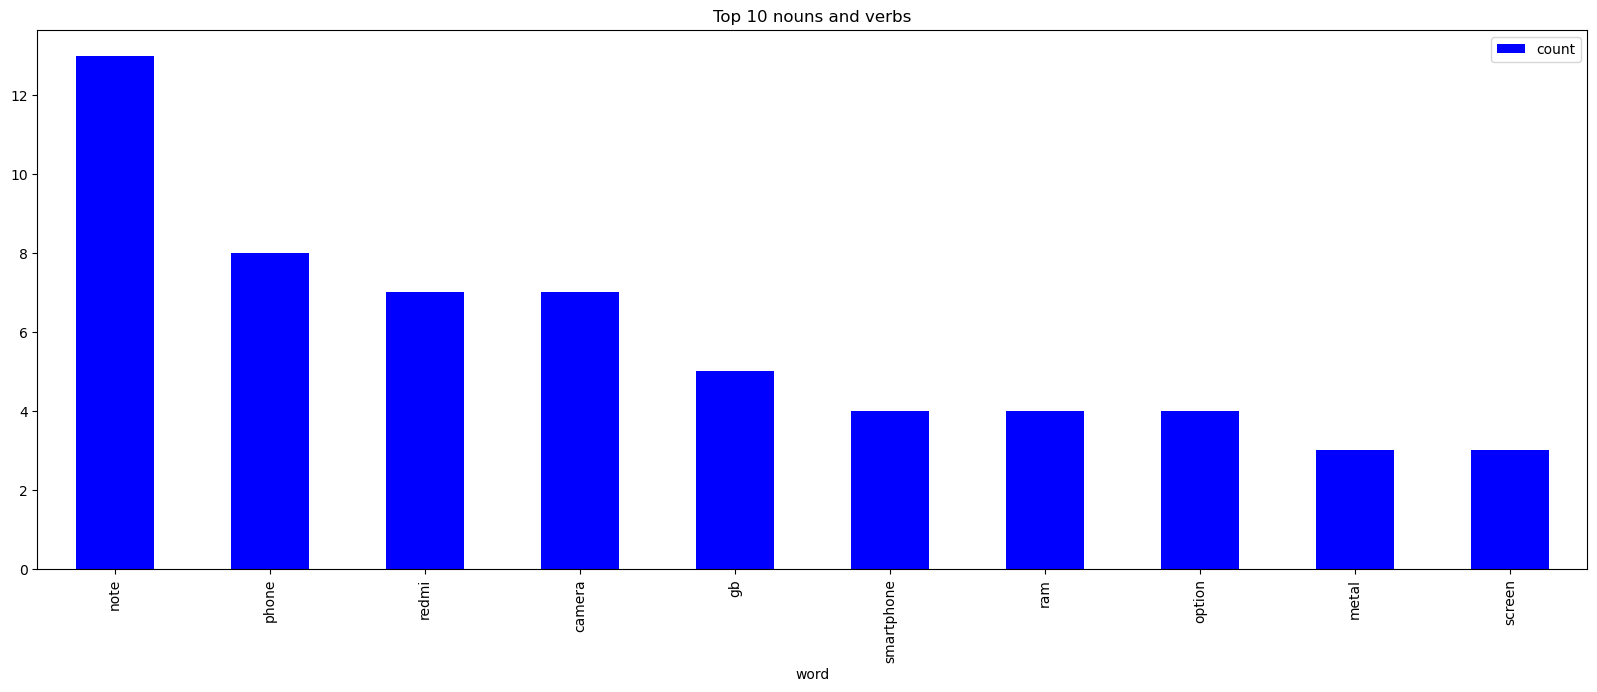

In [36]:
# Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='blue');

# Emotion mining

In [42]:
affin = pd.read_csv('Afinn.csv',encoding='latin1')
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [44]:
affin.tail()

,word,value
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2
2476,zealous,2


In [47]:
doc

best phone range   go   redesigned metal body one attractive features redmi note 3 stunning design the new smartphone arrives time compete attractive meizu metal betting metal body gives smartphone nice sharp look differentiates midrange phones market nnfull hd screen fingerprint scanner ok full hd screen new   nt mean big redmi note 3 pro specifically   ve got 55 inch full hd screen gorilla glass 3 coating pixel density 403 ppp not shabby ask nnanother major upgrade new xiaomi smartphone fingerprint scanner   located smartphone   flash this gives way good ergonomics overall good experience handling smartphonennocta core cpu 3 gb ram option xiaomi opted repeat cpu placed redmi note 2 ai nt broke that s octa core helio x10 cpu 64 bit architecture clocks 20 ghz nnhowever   opted repeat cpu settings nt repeat ram setting to specific   new flagship comes options 2 gb ram option slightly expensive 3 gb ram option this major thing considering tier smartphones cost double xiaomi asking nt ten

In [48]:
# Sample output of the sentence tokanization
for sentences in doc.sents:
    print(sentences)

best phone range   go   redesigned metal body one attractive features redmi note 3 stunning design the new smartphone arrives time compete attractive meizu metal betting metal body gives smartphone nice sharp look differentiates midrange phones market nnfull hd screen fingerprint scanner
ok full hd screen new   nt mean big redmi note 3 pro specifically   ve got 55 inch full hd screen gorilla glass 3 coating pixel density 403 ppp not shabby ask nnanother major upgrade new xiaomi
smartphone fingerprint scanner   located smartphone   flash this gives way good ergonomics overall good experience handling smartphonennocta core cpu 3 gb ram option xiaomi opted repeat cpu placed redmi note 2 ai nt broke that s octa core helio x10 cpu 64 bit architecture clocks 20 ghz nnhowever   opted repeat cpu settings nt repeat ram setting to specific   new flagship comes options 2 gb ram option slightly expensive 3 gb ram option this major thing considering tier smartphones cost double xiaomi asking nt ten

In [49]:
# Create a list of sentences from the spacy document
sentences = [sentences.text for sentences in doc.sents]
sentences

['best phone range   go   redesigned metal body one attractive features redmi note 3 stunning design the new smartphone arrives time compete attractive meizu metal betting metal body gives smartphone nice sharp look differentiates midrange phones market nnfull hd screen fingerprint scanner',
 'ok full hd screen new   nt mean big redmi note 3 pro specifically   ve got 55 inch full hd screen gorilla glass 3 coating pixel density 403 ppp not shabby ask nnanother major upgrade new xiaomi',
 'smartphone fingerprint scanner   located smartphone   flash this gives way good ergonomics overall good experience handling smartphonennocta core cpu 3 gb ram option xiaomi opted repeat cpu placed redmi note 2 ai nt broke that s octa core helio x10 cpu 64 bit architecture clocks 20 ghz nnhowever   opted repeat cpu settings nt repeat ram setting to specific   new flagship comes options 2 gb ram option slightly expensive 3 gb ram option this major thing considering tier smartphones cost double xiaomi ask

In [50]:
# Set the word coumn of the data frame as a index
afinn_scores = affin.set_index('word')['value'].to_dict()
afinn_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [51]:
# User defined function for sentiment score
def sentiment_score (sentence):
    score = 0
    sent_doc = nlp(sentence)
    for token in sent_doc:
        if token.text in afinn_scores:
            score+=afinn_scores[token.text]
    return score  

In [53]:
sentiment_score('I am happy')

3

In [54]:
# Calculate the sentiment scores for each sentences
sentiment_scores = [sentiment_score(sentence) for sentence in sentences]
sentiment_scores[:10]

[10, 1, 22, 17, 11, 2]

In [57]:
sentiment_df = pd.DataFrame({'sentence':sentences,'sentimentscore':sentiment_scores})

In [58]:
sentiment_df[:10]

,sentence,sentimentscore
0,best phone range go redesigned metal body ...,10
1,ok full hd screen new nt mean big redmi note...,1
2,smartphone fingerprint scanner located smart...,22
3,specifically i ve got 16 megapixel rear end ca...,17
4,nice phone product good nt buy snapdeal unna...,11
5,i m disappointed camera rest awesome configura...,2


In [59]:
sentiment_df.sort_values(by = 'sentimentscore',ascending  = False).head()

,sentence,sentimentscore
2,smartphone fingerprint scanner located smart...,22
3,specifically i ve got 16 megapixel rear end ca...,17
4,nice phone product good nt buy snapdeal unna...,11
0,best phone range go redesigned metal body ...,10
5,i m disappointed camera rest awesome configura...,2


In [60]:
sentiment_df['sentimentscore'].describe()

count     6.000000
mean     10.500000
std       8.215838
min       1.000000
25%       4.000000
50%      10.500000
75%      15.500000
max      22.000000
Name: sentimentscore, dtype: float64

# The overall average sentiment score is more than 0 .Tht means the product reviews are good

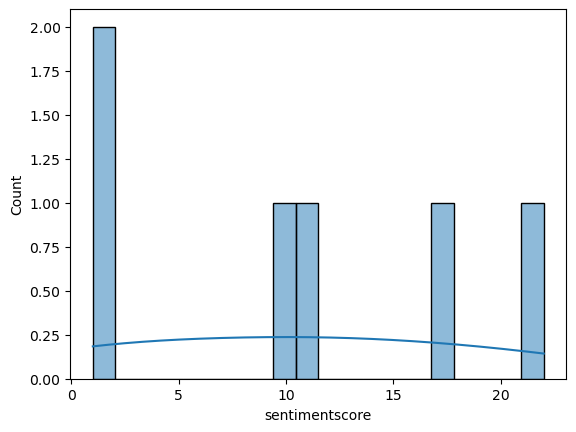

In [62]:
# Plotting by histogram
sns.histplot(data = sentiment_df,x='sentimentscore',bins = 20,kde = True);

# This means the over all sentiment score is good and the product reviews are good and there is a positive emotion in the reviews

# We will try another way of doing it by Textblob dictionery from spacy

In [113]:
iphone_snap=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snap= iphone_snap+ip

In [114]:
# Removing  the repeated reviews 
iphone_snap = list(set(iphone_snap))

In [115]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snap))

In [116]:
iphone_snap

['Good Product, Do not hang. Samsung products are pathetic. Used Grand Qauttro which use to take 20-30 seconds to open even contact list.\n\nApple is quality product. Only problem is you need to pay for everything.',
 'I have got ths phone in perfect condition and thank you snapdeal for perfect elivery.i guess ur are earning the trust back',
 'Superb model , snapdeal delivered as promised time',
 'I am happy with my new Iphone. Thanks you for providing me with the product of my choice with the best deal.',
 'A mush have deal',
 'Good Mobile but its memory will be filled faster its just 8GB limit',
 'The product supplied by Snapdeal is very good at best price. It is as shown',
 'Recently purchase the phone and was a bit doubtfull while purchasing, but i must tell you this is the most best iphone you can get at this price. It was packed beatifully by the seller and same day dispatch.\nPros\n1. Very Cheap prize\n2. IOS 9 upgrade.\n3. Very smooth\n4. Good build quality\n\nCons\n1.Plastic b

In [117]:
# Create a DataFrame with the reviews
df = pd.DataFrame({"Review": iphone_snap})

In [118]:
df.head()

,Review
0,"Good Product, Do not hang. Samsung products ar..."
1,I have got ths phone in perfect condition and ...
2,"Superb model , snapdeal delivered as promised ..."
3,I am happy with my new Iphone. Thanks you for ...
4,A mush have deal


In [119]:
df.shape

(87, 1)

In [141]:
# Import the spacy text blob

In [126]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [130]:
# Load the  NLP model with TextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [131]:
# Define a function to extract sentiments from the text
def get_sentiment(text):
    doc = nlp(text)
    return doc._.polarity, doc._.subjectivity

In [132]:
# Define a function to categorize sentiments into emotions
def categorize_emotion(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [133]:
# Analyze each review and add sentiment and emotion columns to the DataFrame
df['Polarity'], df['Subjectivity'] = zip(*df['Review'].apply(get_sentiment))
df['Emotion'] = df['Polarity'].apply(categorize_emotion)

In [134]:
df.head()

,Review,Polarity,Subjectivity,Emotion
0,"Good Product, Do not hang. Samsung products ar...",0.040000,0.820000,Neutral
1,I have got ths phone in perfect condition and ...,0.666667,0.666667,Positive
2,"Superb model , snapdeal delivered as promised ...",1.000000,1.000000,Positive
3,I am happy with my new Iphone. Thanks you for ...,0.534091,0.488636,Positive
4,A mush have deal,0.000000,0.000000,Neutral


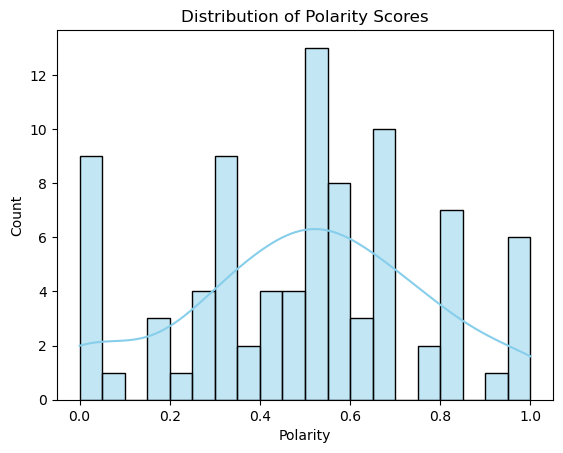

In [138]:
# Plotting the distribution of polarity scores
sns.histplot(df['Polarity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Polarity Scores');

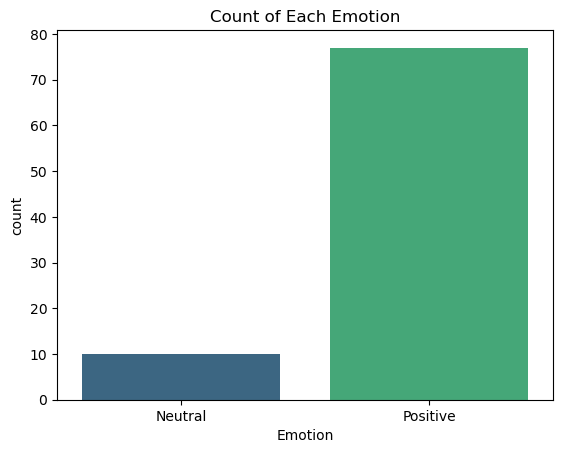

In [140]:
# Plotting the count of each emotion
sns.countplot(x='Emotion', data=df, palette='viridis')
plt.title('Count of Each Emotion');

# The emotion from the above reviews is positive